In [1]:
from google.colab import drive
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
list = ['benign', 'malignant', 'normal']
path = '/content/drive/MyDrive/Machine Learning Project/Dataset_BUSI_with_GT/'

def createDataset(path):
  n_class = 3
  x = []
  y = []
  for i in range(n_class):
    images = os.listdir(path + list[i])
    for image in images: 
      if 'mask' in image:
        continue     
      src = cv2.imread(path + list[i]  + '/' + image, cv2.IMREAD_COLOR)
      
      width = 100
      height = 100

      dsize = (width, height)
      output = cv2.resize(src, dsize)

      x.append(output)
      if(list[i] == 'normal'):
        y.append(0)
      elif(list[i] == 'benign'):
        y.append(1)
      elif(list[i] == 'malignant'):
        y.append(2)
  return x, y

x, y = createDataset(path)

In [6]:
print(len(y))
count_normal = sum(map(lambda e: e == 2, y))
print(count_normal)

780
210


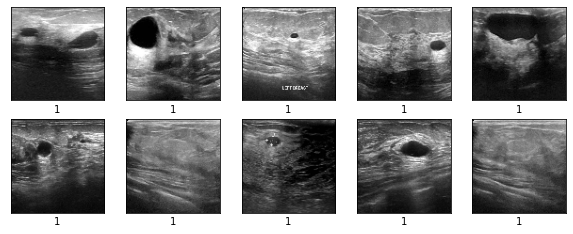

In [7]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i],cmap='gray')
    plt.xlabel(y[i])
plt.show()

In [8]:
x, y = shuffle(x, y)

In [9]:
x = [a/255.0 for a in x]

In [10]:
x = np.array(x)
y = np.array(y)

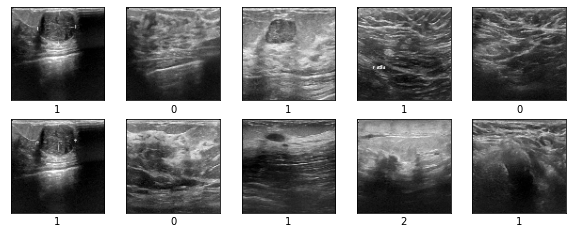

In [11]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i],cmap='gray')
    plt.xlabel(y[i])
plt.show()

In [12]:
import tensorflow as tf

from tensorflow.keras import layers, models

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.9)

In [15]:
print(len(x))

780


In [16]:
model = models.Sequential()
model.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 100)       2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 200)       180200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 200)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 200)       360200    
                                                                 
Total params: 543,200
Trainable params: 543,200
Non-trai

In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 100)       2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 200)       180200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 200)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 200)       360200    
                                                                 
 flatten (Flatten)           (None, 88200)             0

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, 
                    validation_data=(x_test, y_test))

Epoch 1/50
22/22 [==============================] - 59s 3s/step - loss: 1.0844 - accuracy: 0.5584 - val_loss: 1.3848 - val_accuracy: 0.3590
Epoch 2/50
22/22 [==============================] - 57s 3s/step - loss: 0.9350 - accuracy: 0.5812 - val_loss: 1.1419 - val_accuracy: 0.3590
Epoch 3/50
22/22 [==============================] - 58s 3s/step - loss: 0.8884 - accuracy: 0.6268 - val_loss: 1.0562 - val_accuracy: 0.4359
Epoch 4/50
22/22 [==============================] - 56s 3s/step - loss: 0.7886 - accuracy: 0.6595 - val_loss: 1.0886 - val_accuracy: 0.4872
Epoch 5/50
22/22 [==============================] - 56s 3s/step - loss: 0.7287 - accuracy: 0.6880 - val_loss: 1.1527 - val_accuracy: 0.4615
Epoch 6/50
22/22 [==============================] - 56s 3s/step - loss: 0.6438 - accuracy: 0.7265 - val_loss: 0.9430 - val_accuracy: 0.5256
Epoch 7/50
22/22 [==============================] - 56s 3s/step - loss: 0.5894 - accuracy: 0.7251 - val_loss: 1.0828 - val_accuracy: 0.5000
Epoch 8/50
22/22 [==

3/3 - 2s - loss: 2.1948 - accuracy: 0.7179 - 2s/epoch - 576ms/step


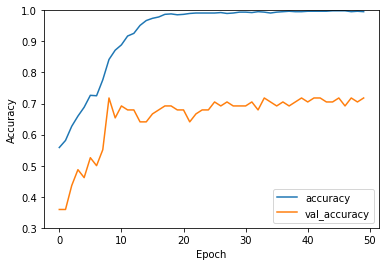

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [22]:
print(test_acc*100)

71.79487347602844
